In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [257]:
#draft3 was worked and excel gave wrong format for dates and sort went hay wire
#Draft4is used with corrections to EBL 1stMP and HBL lastPU
first_data=pd.read_csv('C:\\Users\\Mnsh\\Documents\\INVEST\\nepseData\\proj_fundamental_ana_draft5.csv')

In [258]:
nepse_idx=pd.read_csv('C:\\Users\\Mnsh\\Documents\\INVEST\\nepseData\\proj_fundamental_ana_NepseIdx.csv')

In [259]:
#Keeping nepse Index for all respective quarters along side the data
idx_list=list(nepse_idx['nepse_idx'])*20


In [262]:
#first_data[first_data['company']=='EBL']

In [263]:
#Sorting data according to company then date in ascending order, then reindexing it so that index goes up as well
#This is specilly less confusing during plotting and also operations

#grouped_data=first_data.groupby('company')  #DOES NOT work
#grouped_data.head()
sorted_data=first_data.sort_values(['company', 'date_pub'], ascending=[True, True]) #is working
sorted_data.head(3)   


,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,int_earn,tot_op_inc,op_reported,np_reported,npa,mp
192,ADBL,2011/05/19,011-3,3,5518.0,320.0,244.0,3239.0,3483.0,288.0,319.0,139.0,101.0,8.65,132
193,ADBL,2011/08/14,011-4,4,5937.0,320.0,303.0,3439.0,3481.0,415.0,461.0,158.0,160.0,8.60,122
194,ADBL,2011/11/15,012-1,1,6197.0,320.0,332.0,3481.0,3640.0,75.9,87.1,38.3,28.5,11.00,156


In [267]:
sorted_data=sorted_data.reset_index(drop=True)


In [269]:
#sorted_data.sort_index()[sorted_data['company']=='EBL'] #index is reset but mixed up qtr code remains


In [270]:
#Experimental dataframe
exp_df3=sorted_data

In [271]:
#Getting ratio of loans in each succeding quarter, shift the values by 1 row, either fill shifted NAN 'bfill' or later
#Or take ratio first and fill NAN with 1 - Assume no growth for all in the very first quarter taken

#GROUPBY is the key whish shifts seperately for each group
shift_ln=exp_df3.groupby('company')['loans'].shift()
shift_ln
exp_df3['qq_lo_gr']=exp_df3['loans']/shift_ln 
#exp_df3.head(1)

In [272]:
#exp_df3['shift_ln']=exp_df3.loans.shift() #currently redundant, NOT taking in this iteration Mar4,1200am

#exp_df3.fillna(method='bfill', inplace=False)  #not working while finding ratios, at transition gives false values
# df[1].fillna(0, inplace=True)

#Fill NAN with 1
exp_df3.fillna(1, inplace=True)
exp_df3.head(3)

,index,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,int_earn,tot_op_inc,op_reported,np_reported,npa,mp,qq_lo_gr
0,192,ADBL,2011/05/19,011-3,3,5518.0,320.0,244.0,3239.0,3483.0,288.0,319.0,139.0,101.0,8.65,132,1.000000
1,193,ADBL,2011/08/14,011-4,4,5937.0,320.0,303.0,3439.0,3481.0,415.0,461.0,158.0,160.0,8.60,122,0.999426
2,194,ADBL,2011/11/15,012-1,1,6197.0,320.0,332.0,3481.0,3640.0,75.9,87.1,38.3,28.5,11.00,156,1.045677


In [273]:
#Reset Index
exp_df3=exp_df3.reset_index()
exp_df3.drop(['index'], 1, inplace=True)  #reset and drop the old redundant index which comes up as column
exp_df3.head(2)
#exp_df3.drop(['qq_lo_gr1'], 1)[:3]

,level_0,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,int_earn,tot_op_inc,op_reported,np_reported,npa,mp,qq_lo_gr
0,0,ADBL,2011/05/19,011-3,3,5518.0,320.0,244.0,3239.0,3483.0,288.0,319.0,139.0,101.0,8.65,132,1.000000
1,1,ADBL,2011/08/14,011-4,4,5937.0,320.0,303.0,3439.0,3481.0,415.0,461.0,158.0,160.0,8.60,122,0.999426


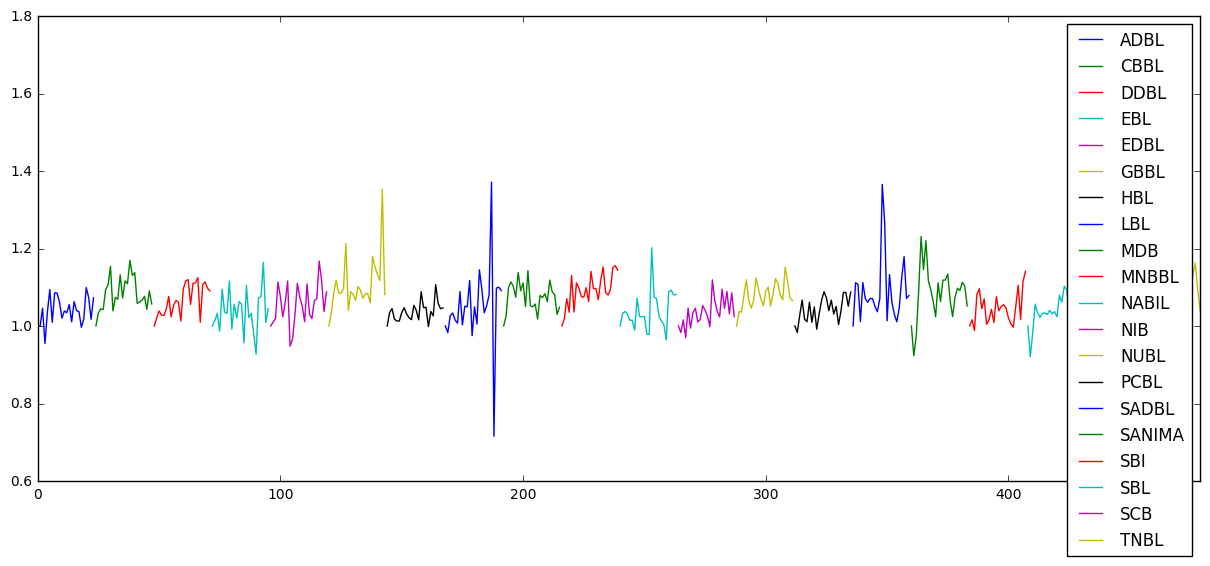

In [274]:

fig, ax=plt.subplots(figsize=(15,6))
for label, df in exp_df3.groupby('company'):
    #exp_df2.set_index('company')
    #df.qq_lg.plot( ax=ax, label=label)
    df.qq_lo_gr.plot(label=label)
plt.legend()    

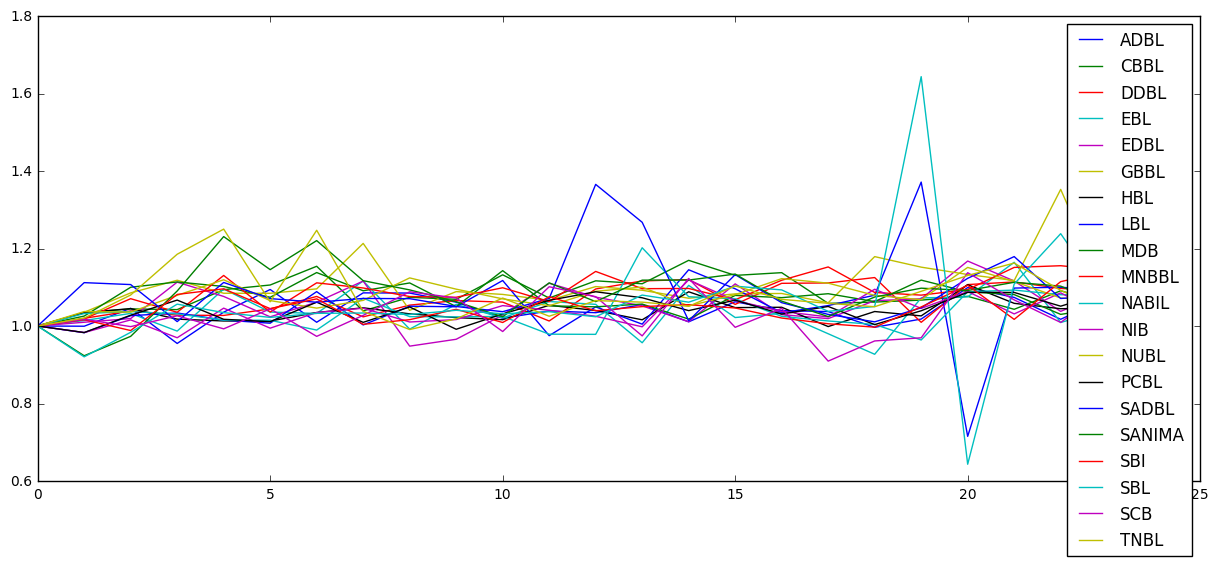

In [275]:
#use range(24) for each plt instead of index
fig, ax=plt.subplots(figsize=(15,6))
for label, df in exp_df3.groupby('company'):
    
    plt.plot(range(24), df.qq_lo_gr, label=label)
plt.legend()

In [276]:
#Attempting to seperate graphs, first by incremental of 1 then .1, simply incremental value is added to the series
#But works poorly, as the curves are flattened due to large y range and small amplitude of each value plotted
incremental=[]
incremental_01=[]
for i in range(20):
    for x in range (24):
        incremental.append(i)
        incremental_01.append(i/10)
        
#x=[0]*24
#x
#incremental   working perfectly fine
#incremental_01

In [277]:
exp_df3['ln_incremental']=exp_df3.qq_lo_gr+incremental    
exp_df3['ln_incremental_01']=exp_df3.qq_lo_gr+incremental_01


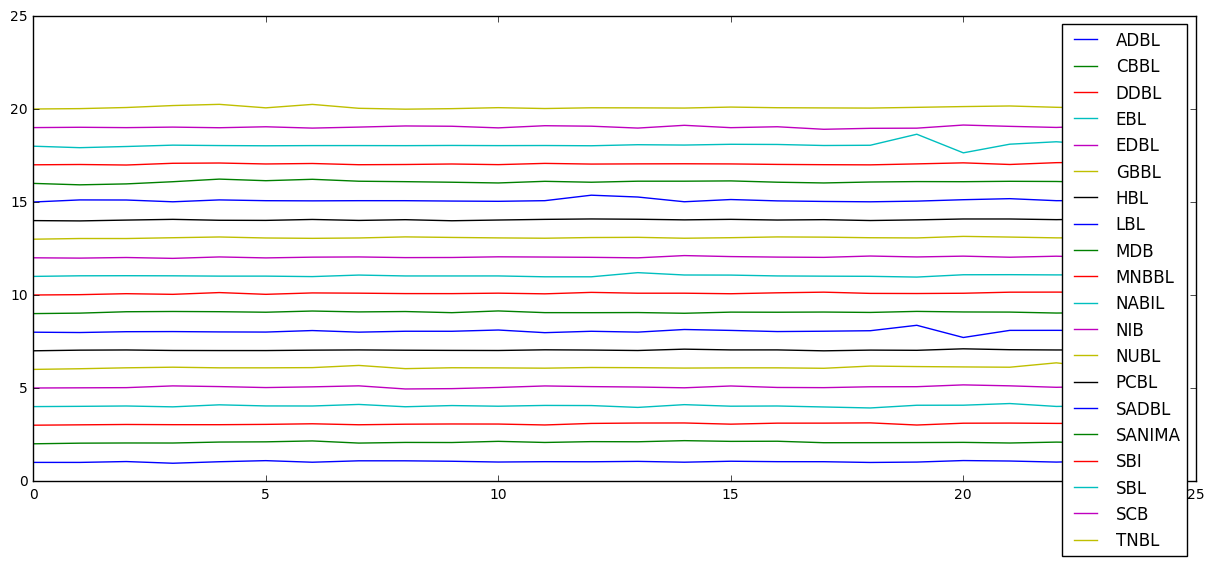

In [278]:
fig, ax=plt.subplots(figsize=(15,6))
for label, df in exp_df3.groupby('company'):
    
    plt.plot(range(24), df.ln_incremental, label=label)
    
plt.legend()

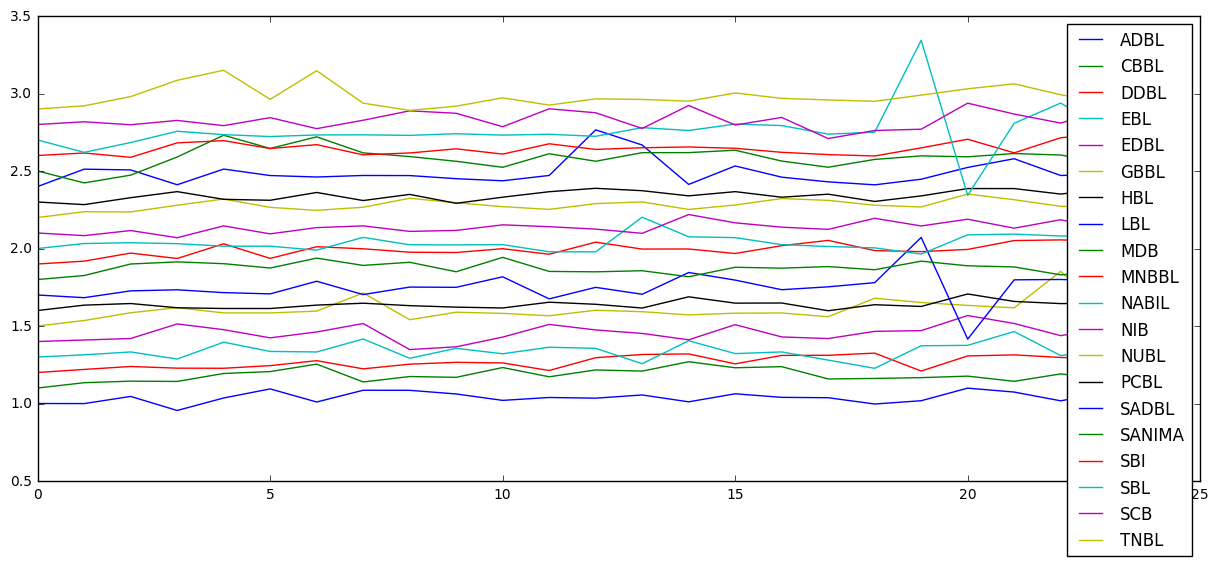

In [279]:
fig, ax=plt.subplots(figsize=(15,6))
for label, df in exp_df3.groupby('company'):
    
    plt.plot(range(24), df.ln_incremental_01, label=label)
plt.legend()

#Try to use temporary series rather than creating a while new column each time

In [280]:
#test
import numpy as np
lst=[1, 2, 4, 6]
product = np.product([1, 2, 3])
product1=np.prod(lst[1:])
product1

48

In [281]:
#Creating a geometric series
#First split the whole list in 20 small list of each size 24
n=24
work_list=list(exp_df3.qq_lo_gr)
multi_list=[work_list[i:i+n] for i in range(0, len(work_list), n)]  #key code to split
multi_list[:3]
len(multi_list[1])
#multi_list[0]

24

In [282]:
#http://stackoverflow.com/questions/11807722/product-of-a-list-python

geo_gr1=[]

for i in range(20):
    x=multi_list[i]
    y=1
    
    for s in range(24):
        prod=np.product(x[:s+1])
        
        y=(prod**(1/(s+1)))
        geo_gr1.append(y)
        
        
geo_gr1[:5]

[1.0,
 0.9997128499581861,
 1.0148050889086082,
 0.99949718046095637,
 1.0066298516241534]

In [283]:
exp_df3['ln_geo_gr']=geo_gr1
#exp_df3.head(30)

#Finding annualize PE for all quarters

#note you can use several else...if statements in your lambda definition:
#f = lambda x: 1 if x>0 else 0 if x ==0 else -1
#http://stackoverflow.com/questions/1585322/is-there-a-way-to-perform-if-in-pythons-lambda

#earning=exp_df3['op_reported'].map(lambda x: x*1.4 if exp_df3.qtr_code=4 else x)#else x*2.5 if qtr_code=2 else x*4.5 if qtr_code=1 else x)
#exp_df3['op_reported'].map(lambda x: x*1.4 if exp_df3['qtr_code']==3 else x)

In [287]:
#Annualizing all quarters op_reported by multiplying appropriate factors
e=np.where(exp_df3['qtr_code']==1, exp_df3['op_reported']*4.5, 
           np.where(exp_df3['qtr_code']==2, exp_df3['op_reported']*2.5,
                    np.where(exp_df3['qtr_code']==3, exp_df3['op_reported']*1.4, exp_df3['op_reported'])))
                    
e[:10]

array([ 194.6 ,  158.  ,  172.35,  227.5 ,  197.4 ,  183.  ,  197.1 ,
        242.5 ,  232.4 ,  240.  ])

In [288]:
#Deriving estimated annyal earning by deducting 35pc tax and other stuffs
f=e*.65
f[:10]

array([ 126.49  ,  102.7   ,  112.0275,  147.875 ,  128.31  ,  118.95  ,
        128.115 ,  157.625 ,  151.06  ,  156.    ])

In [289]:
#changed - previously ann_e_op was f, now it is e and f is ann_e_np
exp_df3['ann_e_op']=e
exp_df3['ann_e_np']=f
#exp_df3.head()

In [290]:
exp_df3['ann_eps_op']=exp_df3['ann_e_np']*100/exp_df3['paid_up']
exp_df3.head()

,level_0,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,...,np_reported,npa,mp,qq_lo_gr,ln_incremental,ln_incremental_01,ln_geo_gr,ann_e_op,ann_e_np,ann_eps_op
0,0,ADBL,2011/05/19,011-3,3,5518.0,320.0,244.0,3239.0,3483.0,...,101.0,8.65,132,1.000000,1.000000,1.000000,1.000000,194.60,126.4900,39.528125
1,1,ADBL,2011/08/14,011-4,4,5937.0,320.0,303.0,3439.0,3481.0,...,160.0,8.60,122,0.999426,0.999426,0.999426,0.999713,158.00,102.7000,32.093750
2,2,ADBL,2011/11/15,012-1,1,6197.0,320.0,332.0,3481.0,3640.0,...,28.5,11.00,156,1.045677,1.045677,1.045677,1.014805,172.35,112.0275,35.008594
3,3,ADBL,2012/02/09,012-2,2,6397.0,320.0,448.0,3794.0,3476.0,...,68.8,8.80,108,0.954945,0.954945,0.954945,0.999497,227.50,147.8750,46.210938
4,4,ADBL,2012/05/10,012-3,3,6772.0,320.0,486.0,4106.0,3600.0,...,114.0,8.80,128,1.035673,1.035673,1.035673,1.006630,197.40,128.3100,40.096875


In [291]:
exp_df3['ann_pe_op']=exp_df3['mp']/exp_df3['ann_eps_op']


#MNBBL - paid up moved 14x and mp moved 5x, ie total returns is 70x
#Assuming current index/PEs are fair
#MNBBL probably is undervalued at the beginning
#Assuming PE of 15 to be fair, MNBBL was available at 140 or 3.5x PE or undervalued by 14/3.5 = 4 x
#Therefore out of 70x return 4 - 6 x times is due to it being undervalued, 12 - 18x from the performance
#if we reset the price fully it is worth about 49000 in todays price 
#if recorrect for index movement by 4x, mp could be 12500
#This all means somebody could have paid 10000 for a share and still would enjoy a return of close to 5x
#somebody bought 100 share for 140 each putting 14000 back in 2011 would have about 1500 shares worth - 1050000
#If bank gives 30% cash div, he can have 1500*30=45000 each year, 3x of initial outlay


In [292]:
exp_df3['nepse_idx']=idx_list

In [293]:
exp_df3['nepse_ret']=exp_df3['nepse_idx']/exp_df3.groupby('company')['nepse_idx'].shift()  #works fine
#exp_df3.fillna(1, inplace=True)
exp_df3.head()

,level_0,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,...,qq_lo_gr,ln_incremental,ln_incremental_01,ln_geo_gr,ann_e_op,ann_e_np,ann_eps_op,ann_pe_op,nepse_idx,nepse_ret
0,0,ADBL,2011/05/19,011-3,3,5518.0,320.0,244.0,3239.0,3483.0,...,1.000000,1.000000,1.000000,1.000000,194.60,126.4900,39.528125,3.339394,345,NaN
1,1,ADBL,2011/08/14,011-4,4,5937.0,320.0,303.0,3439.0,3481.0,...,0.999426,0.999426,0.999426,0.999713,158.00,102.7000,32.093750,3.801363,358,1.037681
2,2,ADBL,2011/11/15,012-1,1,6197.0,320.0,332.0,3481.0,3640.0,...,1.045677,1.045677,1.045677,1.014805,172.35,112.0275,35.008594,4.456049,347,0.969274
3,3,ADBL,2012/02/09,012-2,2,6397.0,320.0,448.0,3794.0,3476.0,...,0.954945,0.954945,0.954945,0.999497,227.50,147.8750,46.210938,2.337109,317,0.913545
4,4,ADBL,2012/05/10,012-3,3,6772.0,320.0,486.0,4106.0,3600.0,...,1.035673,1.035673,1.035673,1.006630,197.40,128.3100,40.096875,3.192269,384,1.211356


In [294]:
exp_df3.fillna(1, inplace=True)

In [295]:
#ratio of paid up  .. calculationg paid up growth
shft_pu=exp_df3.groupby('company')['paid_up'].shift()
exp_df3['pu_grth']=exp_df3['paid_up']/shft_pu


In [296]:
exp_df3.fillna(1, inplace=True)

In [297]:
#mp could total could calculate in reference to the ratio to the original pu

In [298]:
#df.groupby('id').nth(1)
#http://stackoverflow.com/questions/20067636/pandas-dataframe-get-first-row-of-each-group
#make a list of 1st paid up, copy 24 times and divide each paid up in original by this series
first_pu_df=exp_df3[['company', 'paid_up']].groupby('company').nth(0)
first_pu_df.head()
first_pu_list= list(first_pu_df.paid_up)
#first_pu_list=round(first_pu_list, 2)

In [299]:
#http://stackoverflow.com/questions/5326112/how-to-round-each-item-in-a-list-of-floats-to-2-decmial-places
#print np.round(a,2)
#myFormattedList = [ '%.2f' % elem for elem in myList ]
import numpy as np
#np.round(first_pu_list, 1)   #not able to reduce to decimal places
first_pu_round =  [float('%.2f' % elem) for elem in first_pu_list] #working fine
#first_pu_round  


In [300]:
#Rounding off the pu as they are coming in too long decimals
pu_extended=[]
for i in first_pu_round:
    pu_extended.extend([i]*24)
#pu_extended
len(pu_extended)

480

In [301]:
exp_df3['pu_multiple']=exp_df3['paid_up']/pu_extended   #giving correct multiples

In [302]:
#price reset (unadjusting) as per growth in capital (which previously been adjusted)
#exp_df3['mp']*exp_df3['pu_grth']

exp_df3['mp_reset']=exp_df3['mp']*exp_df3['pu_multiple']

In [303]:
#calculating absolute return by adjusting backward for dilution then multiplying by cur q price and finally taking ratioo
shift_mp_reset=exp_df3.groupby('company')['mp_reset'].shift()
exp_df3['adj_qq_ret']=exp_df3.mp_reset/shift_mp_reset
exp_df3.fillna(1, inplace=True)

In [304]:
#diff in nepse ret and adj return for each company
exp_df3['ret_diff']=exp_df3['adj_qq_ret']-exp_df3['nepse_ret']+1

In [305]:
#compound ret till date above and beyond nepse - example with MNBBL
ret_list=list(exp_df3['ret_diff'][exp_df3['company']=="MNBBL"])
ret_list
np.product(ret_list)

13.146324096592886

In [306]:
#absolute return - reset mp/the first mp
#df['column_name'] = df['column_name'].div(10000)
#a[:,0]
first_mp_df=(exp_df3[['company','mp_reset', 'mp']].groupby('company')).nth(0)
#first_mp_df['mp_reset'][3]=1000   #correcting value of everest bank mp only in this series ## done already
first_mp_df
first_mp_list=list(first_mp_df['mp_reset'])
mp_extended=[]
for x in first_mp_list:
    mp_extended.extend([x]*24)
len(mp_extended)

480

In [307]:
#calculating total return
#the very first price is same as first mp which
exp_df3['abs_ret']=exp_df3['mp_reset']/mp_extended

In [308]:
#calculating apparent unadjusted return from given market price alone at end of each qudarte
exp_df3['gross_ret']=exp_df3['mp']/mp_extended

In [309]:
#calculate gross return on nepse - divide values by 1st q
nepse_base=[345]*480
len(nepse_base)
exp_df3['nepse_cum_ret']=exp_df3['nepse_idx']/nepse_base

In [310]:
#Returns due from company alone after dividing by the nepse return in gross return from nepse
exp_df3['rel_ret']=exp_df3['abs_ret']/exp_df3['nepse_cum_ret']  

#also calculate absolute return - cum returs from company adjusted price alone
#calculate relative return - cum returns from ret difference 
#Find the geometric rate of growth of both by taking roots and this will indicate the real abs/rel q to q performance
#But the return are of past - need to find the parameters that correlates best with good returns
#take a cut off, say ret_diff>1.05 - assign 0 or 1 and use regression/machine learning or random forest or whateve
#Even simple correlations will do
#modeling including black and scholes might help too
#graph returns and final cum ret for all companies to highlight relative performance measures

###Beyesian would probably better choice, once we get better/high loan portfolio - predict next qtr income 


In [311]:
#constructing absolute and relative returns

In [312]:
#data.iloc[:,[0,3]]
#df.ix[:,'b':]
#select all rows and columns mp and beyond ie all the derived columns
exp_df3[exp_df3['company']=="MNBBL"].ix[:, 'mp':]   

,mp,qq_lo_gr,ln_incremental,ln_incremental_01,ln_geo_gr,ann_e_op,ann_e_np,ann_eps_op,ann_pe_op,nepse_idx,nepse_ret,pu_grth,pu_multiple,mp_reset,adj_qq_ret,ret_diff,abs_ret,gross_ret,nepse_cum_ret,rel_ret
216,140,1.000000,10.000000,1.900000,1.000000,7.98,5.1870,25.935000,5.398111,345,1.000000,1.000000,1.0000,140.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
217,160,1.018405,10.018405,1.918405,1.009160,8.00,5.2000,26.000000,6.153846,358,1.037681,1.000000,1.0000,160.0000,1.142857,1.105176,1.142857,1.142857,1.037681,1.101357
218,144,1.070482,10.070482,1.970482,1.029200,10.80,7.0200,35.100000,4.102564,347,0.969274,1.000000,1.0000,144.0000,0.900000,0.930726,1.028571,1.028571,1.005797,1.022643
219,166,1.035453,10.035453,1.935453,1.030760,13.25,8.6125,43.062500,3.854862,317,0.913545,1.000000,1.0000,166.0000,1.152778,1.239233,1.185714,1.185714,0.918841,1.290446
220,270,1.130435,10.130435,2.030435,1.049966,11.90,7.7350,38.675000,6.981254,384,1.211356,1.000000,1.0000,270.0000,1.626506,1.415150,1.928571,1.928571,1.113043,1.732701
221,290,1.036058,10.036058,1.936058,1.047635,12.20,7.9300,39.650000,7.313997,402,1.046875,1.000000,1.0000,290.0000,1.074074,1.027199,2.071429,2.071429,1.165217,1.777719
222,255,1.111369,10.111369,2.011369,1.056511,15.75,10.2375,41.785714,6.102564,448,1.114428,1.225000,1.2250,312.3750,1.077155,0.962727,2.231250,1.821429,1.298551,1.718262
223,271,1.098121,10.098121,1.998121,1.061625,18.75,12.1875,49.744898,5.447795,511,1.140625,1.000000,1.2250,331.9750,1.062745,0.922120,2.371250,1.935714,1.481159,1.600942
224,278,1.076046,10.076046,1.976046,1.063217,16.66,10.8290,44.200000,6.289593,493,0.964775,1.000000,1.2250,340.5500,1.025830,1.061055,2.432500,1.985714,1.428986,1.702257
225,300,1.074205,10.074205,1.974205,1.064311,16.00,10.4000,42.448980,7.067308,547,1.109533,1.000000,1.2250,367.5000,1.079137,0.969603,2.625000,2.142857,1.585507,1.655622


#how to predict the future price movement, take relative movements q to q, +ve or -ve returns and percentage
#May be take reset the mp nullifying adjustment due to hikes in paid up, assuming no merger
#take eps and perhaps returs on equity or earnings yeild as marker of - value below or above par
#Hypothesis if yields are high price ought to go up and vice versa
#Always make comparision in context of market index  // as marker of sentiment
#strategy to correct NEPSE - Add all capital poured as rights and fpo and ?bonus and reset index quarterly

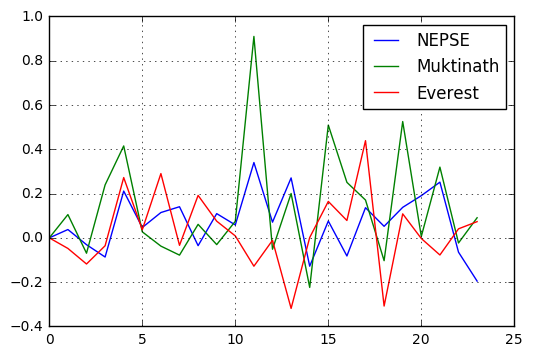

In [313]:
plt.plot(range(24), (exp_df3['nepse_ret']-1)[exp_df3['company']=="MNBBL"], label="NEPSE")#, kind='bar')
plt.plot(range(24), (exp_df3['ret_diff']-1)[exp_df3['company']=="MNBBL"], label='Muktinath')
plt.plot(range(24), (exp_df3['ret_diff']-1)[exp_df3['company']=="EBL"], label='Everest')
plt.grid()
plt.legend(loc='best')

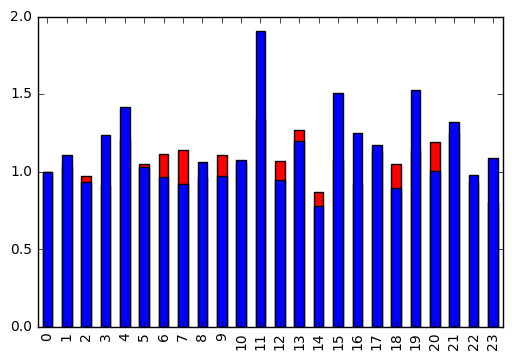

In [314]:
exp_df3['nepse_ret'][exp_df3['company']=="MNBBL"].reset_index(drop=True).plot(kind='bar', color='r')
exp_df3['ret_diff'][exp_df3['company']=="MNBBL"].reset_index(drop=True).plot(kind='bar')
#Though plotted against the index, not very clear by how much margin MNBBL overperforms in blue only bars

In [315]:
#evensList = [x for x in myList if x % 2 == 0]
evenList= [x for x in range(48) if x % 2 ==0]
len(evenList)
oddList=[x+1 for x in evenList]
len(oddList)
len(oddList[2:])
#

22

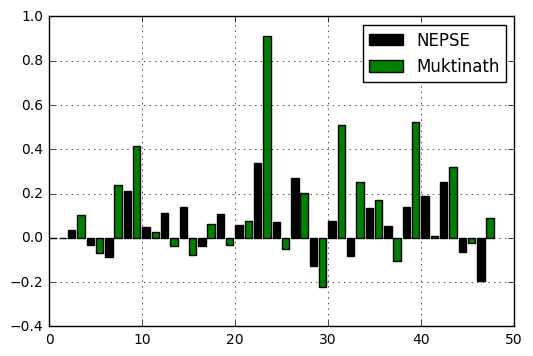

In [316]:
plt.bar(evenList, (exp_df3['nepse_ret']-1)[exp_df3['company']=="MNBBL"], color='black', label='NEPSE')#.plot(kind='bar')#, kind='bar')
plt.bar(oddList, (exp_df3['ret_diff']-1)[exp_df3['company']=="MNBBL"], color='g', label='Muktinath')
plt.legend(loc='best')
plt.grid()

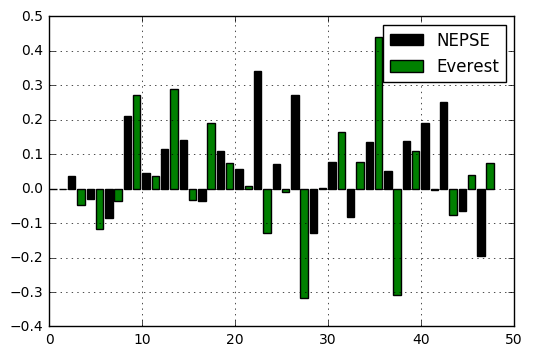

In [317]:
#Ebl is showing 800% return on second quarter need to check, and avoided in this graph
plt.bar(evenList[:], (exp_df3['nepse_ret']-1)[exp_df3['company']=="EBL"], color='black', label='NEPSE')#.plot(kind='bar')#, kind='bar')
plt.bar(oddList[:], (exp_df3['ret_diff']-1)[exp_df3['company']=="EBL"], color='g', label='Everest')
plt.legend(loc='best')
plt.grid()

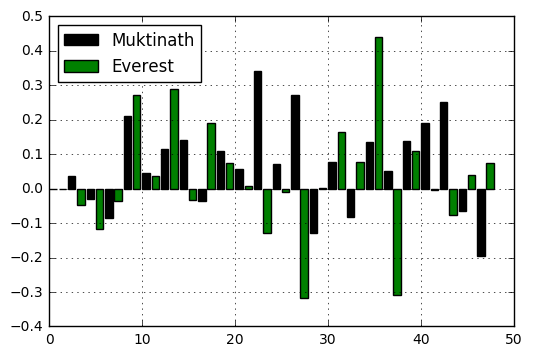

In [318]:
plt.bar(evenList[:], (exp_df3['nepse_ret']-1)[exp_df3['company']=="MNBBL"], color='black', label='Muktinath')#.plot(kind='bar')#, kind='bar')
plt.bar(oddList[:], (exp_df3['ret_diff']-1)[exp_df3['company']=="EBL"], color='g', label='Everest')
plt.legend(loc='best')
plt.grid()

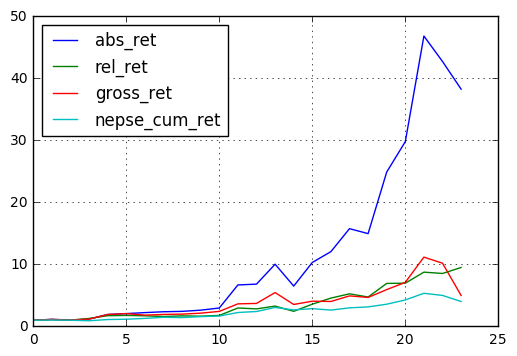

In [319]:
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="MNBBL"])
plt.plot(range(24), exp_df3['rel_ret'][exp_df3['company']=="MNBBL"])
plt.plot(range(24), exp_df3['gross_ret'][exp_df3['company']=="MNBBL"])
plt.plot(range(24), exp_df3['nepse_cum_ret'][exp_df3['company']=="MNBBL"])
plt.legend(loc='best')
plt.grid()

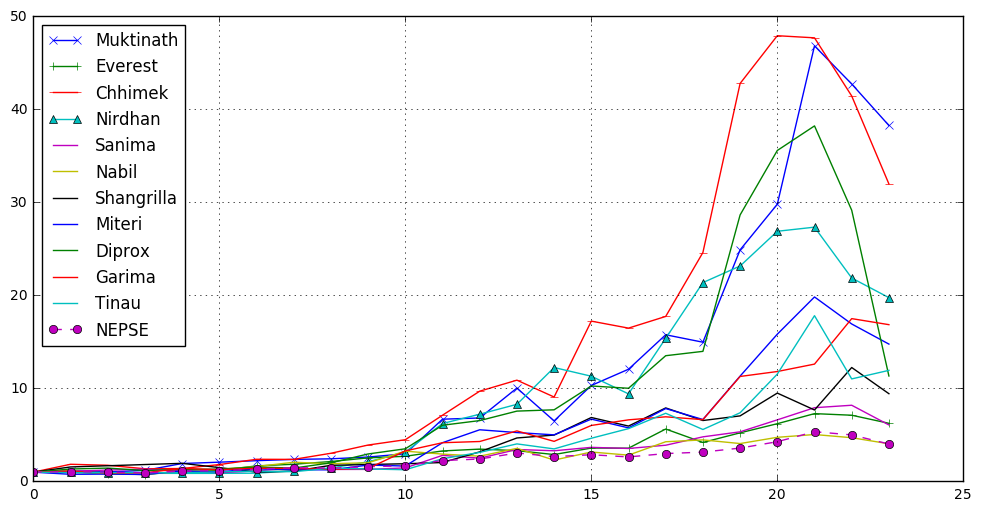

In [320]:
plt.figure(figsize=(12,6))
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="MNBBL"], label='Muktinath', marker='x')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="EBL"], label='Everest', marker='+')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="CBBL"], label='Chhimek', marker='_')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="NUBL"], label='Nirdhan', marker='^')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="SANIMA"], label='Sanima')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="NABIL"], label='Nabil')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="SADBL"], label='Shangrilla')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="MDB"], label='Miteri')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="DDBL"], label='Diprox')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="GBBL"], label='Garima')
plt.plot(range(24), exp_df3['abs_ret'][exp_df3['company']=="TNBL"], label='Tinau')
plt.plot(range(24), exp_df3['nepse_cum_ret'][exp_df3['company']=="NUBL"], label='NEPSE', linestyle='--', marker='o')

plt.grid()
plt.legend(loc='best')

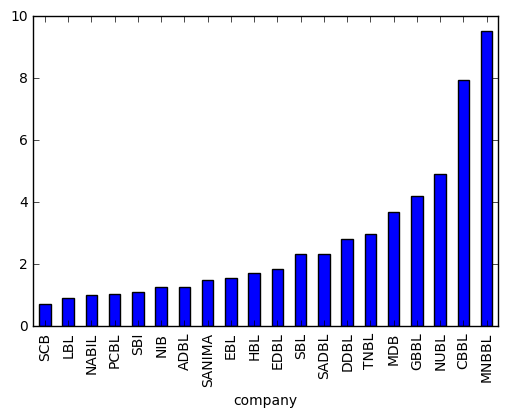

In [321]:
#exp_df3['abs_ret'].groupby(exp_df3['company']).nth(23)#/exp_df3['nepse_cum_ret'].nth(23)
#exp_df3['nepse_cum_ret'][exp_df3['company']=='MNBBL'].tail(1) # =4.02

#RETURN WITH RESPECT TO NEPSE
exp_df3['abs_ret'].groupby(exp_df3['company']).nth(23)/4.02
(exp_df3['abs_ret'].groupby(exp_df3['company']).nth(23)/4.02).sort_values().plot(kind='bar')

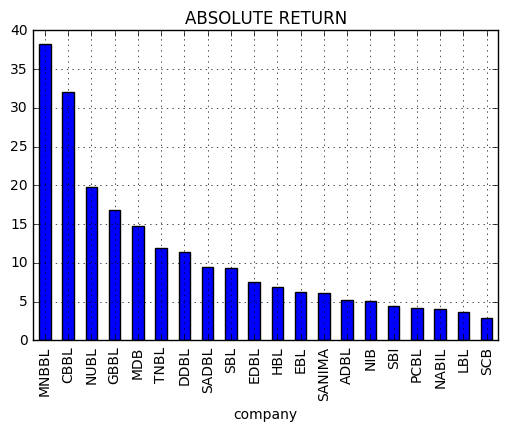

In [322]:
#plt.plot

(exp_df3['abs_ret'].groupby(exp_df3['company']).nth(23).sort_values(ascending=False)).plot(kind='bar')
#plt.xticks(rotation=90)
plt.title('ABSOLUTE RETURN')
plt.grid()

In [323]:
#All the experimentation below
exp_df3.shape

(480, 35)

In [324]:
#list(exp_df3[['company', 'company']].groupby('company').nth(0))
company_list=list(exp_df3['company'].unique())

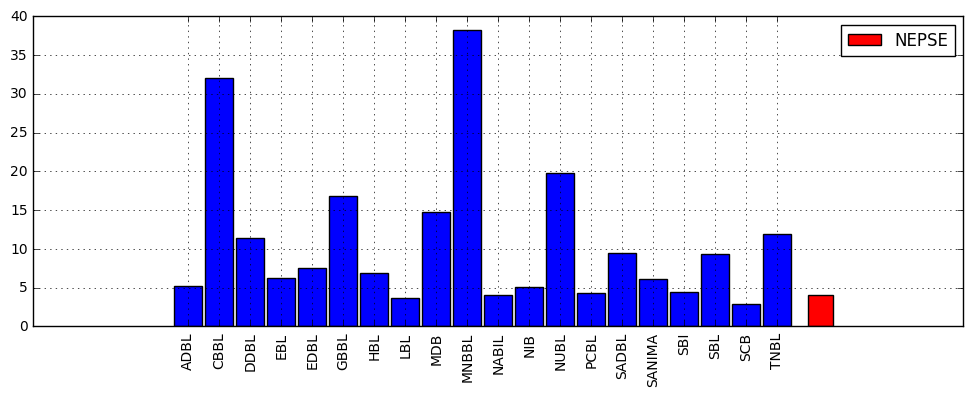

In [325]:
#plt.xticks(x, labels, rotation='vertical')
plt.figure(figsize=(12, 4))
abs_ret_df=(exp_df3[['company', 'abs_ret']].groupby('company').nth(23))
#len(exp_df3[['company', 'abs_ret']].groupby('company').nth(23))  #len=20
plt.bar(range(20), abs_ret_df['abs_ret'], width=0.9, align='center')
plt.bar(20, 4, label='NEPSE', color='r')
plt.xticks(range(20), company_list, rotation='vertical')
plt.legend()
plt.grid()
plt.show()

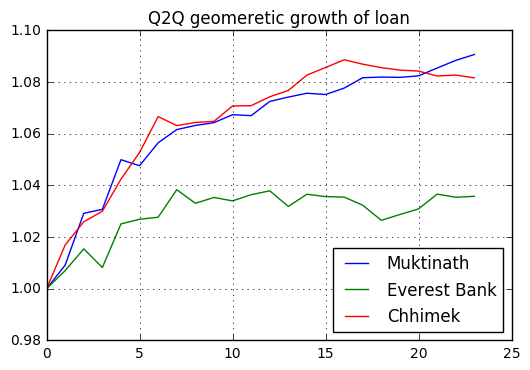

In [326]:
plt.plot(range(24), exp_df3['ln_geo_gr'][exp_df3['company']=="MNBBL"], label='Muktinath')
plt.plot(range(24), exp_df3['ln_geo_gr'][exp_df3['company']=="EBL"], label='Everest Bank')
plt.plot(range(24), exp_df3['ln_geo_gr'][exp_df3['company']=="CBBL"], label='Chhimek')
plt.legend(loc='best')
plt.grid()
plt.title('Q2Q geomeretic growth of loan')

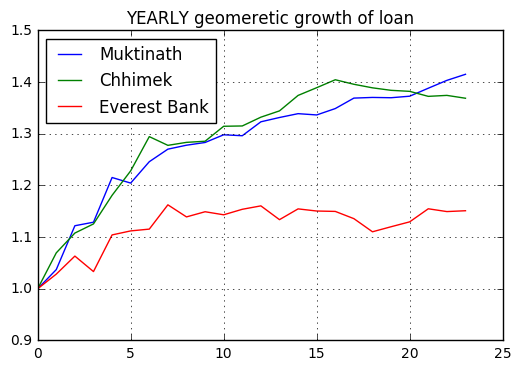

In [327]:
exp_yr=[4]*24
plt.plot(range(24), (exp_df3['ln_geo_gr'][exp_df3['company']=="MNBBL"])**exp_yr, label='Muktinath')
plt.plot(range(24), (exp_df3['ln_geo_gr'][exp_df3['company']=="CBBL"])**exp_yr, label='Chhimek')
plt.plot(range(24), (exp_df3['ln_geo_gr'][exp_df3['company']=="EBL"])**exp_yr, label='Everest Bank')

plt.legend(loc='best')
plt.grid()
plt.title('YEARLY geomeretic growth of loan')

<Container object of 24 artists>

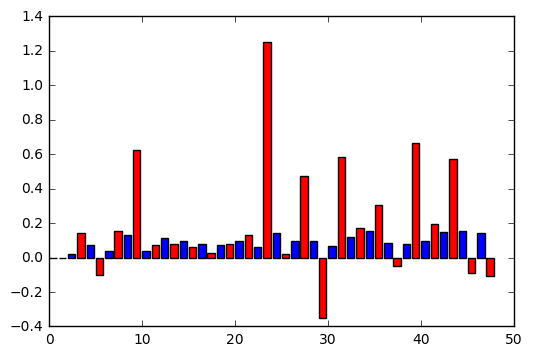

In [328]:
#list(my_dataframe.columns.values)
exp_df3.columns.values
#exp_df3['ln_geo_gr'][exp_df3['company']=='MNBBL'] #no this one
#plt.bar(exp_df3['adj_qq_ret'][exp_df3['company']=='MNBBL'])
#0, 3, 5 [i]
thirdList=[i+2 for i in oddList]
#fourthList=
plt.bar(evenList, (exp_df3['qq_lo_gr']-1)[exp_df3['company']=='MNBBL'], color='b')
plt.bar(oddList, (exp_df3[ 'adj_qq_ret']-1)[exp_df3['company']=='MNBBL'], color='r')
#plt.bar(thirdList, exp_df3[ 'nepse_ret'][exp_df3['company']=='MNBBL'], color='g')

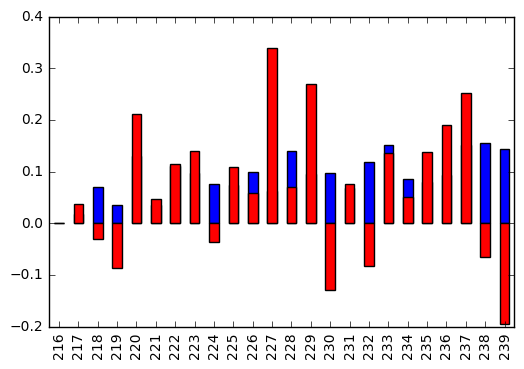

In [329]:
#doing other way
#df.plot(kind='bar')

#mnbbl_df.reset_index(inplace=True)
#plt.bar(range(24), mnbbl_df['qq_lo_gr1'])#, 'qq_lo_gr1']])
#plt.bar(mnbbl_df['qq_lo_gr1'])
#mnbbl_df.drop('level_0', axis=1, inplace=True)
#df = df.reset_index(drop=True)

mnbbl_df=exp_df3[exp_df3['company']=='MNBBL'].copy()
#mnbbl_df=mnbbl_df.reset_index(drop=True)    #now works
list_of_one=[1]*24
mnbbl_df.head()
#plt.bar(mnbbl_df['qq_lo_gr1']) does not work
mnbbl_df['qq_lo_gr'].map(lambda x: x-1).plot(kind='bar')  #, mnbbl_df['adj_qq_ret']-1].plot(kind='bar')
mnbbl_df['nepse_ret'].map(lambda x: x-1).plot(kind='bar', color='r')

In [330]:
#df.plot(kind='bar')
mnbbl_df['qq_lo_gr_minus1']=mnbbl_df['qq_lo_gr'].map(lambda x: x-1)
mnbbl_df['nepse_ret_minus1']=mnbbl_df['nepse_ret'].map(lambda x: x-1)
mnbbl_df['adj_qq_ret_minus1']=mnbbl_df['adj_qq_ret'].map(lambda x: x-1)


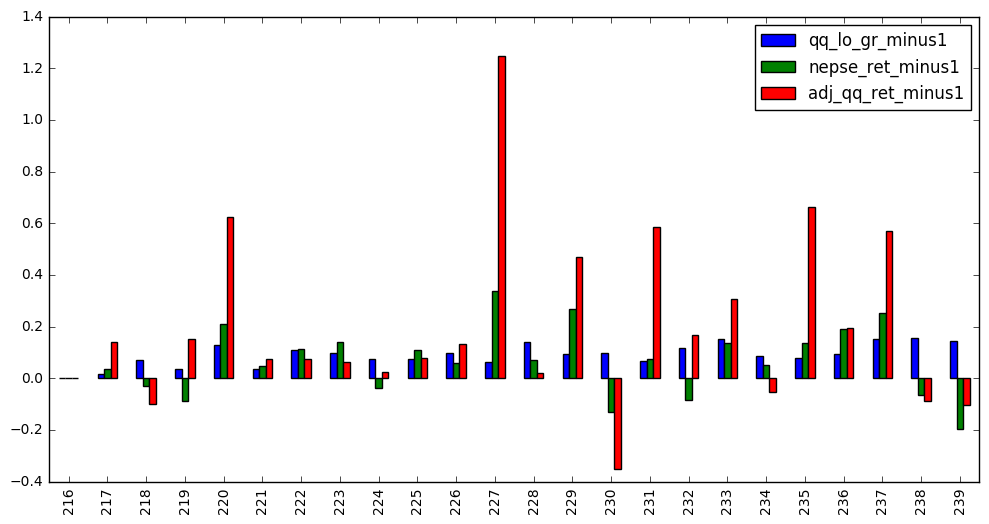

In [331]:
#df.plot(kind='bar',grid=True,subplots=True,sharex=True); 
plt.figure(figsize=(12,6))
mnbbl_df[['qq_lo_gr_minus1', 'nepse_ret_minus1', 'adj_qq_ret_minus1']].plot(kind='bar', figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A7D7C12828>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001A7D7D75438>], dtype=object)

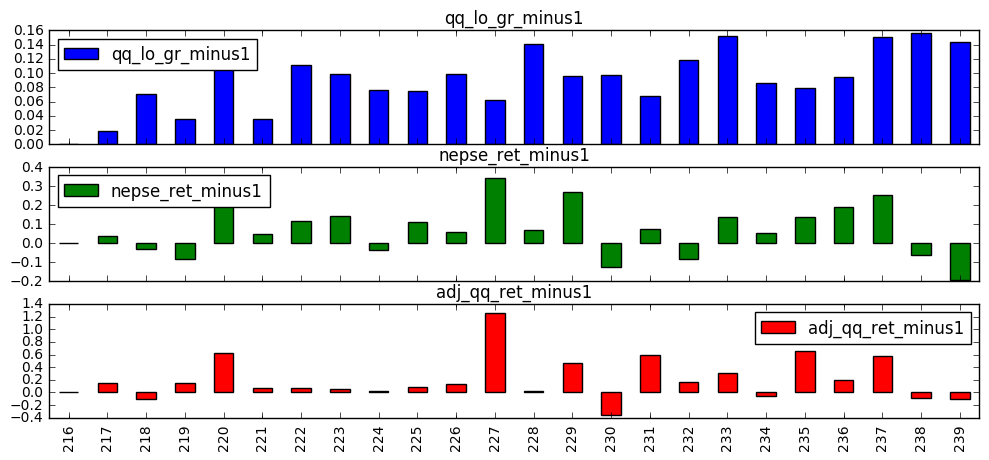

In [332]:
mnbbl_df[['qq_lo_gr_minus1', 'nepse_ret_minus1', 'adj_qq_ret_minus1']].plot(kind='bar', subplots=True, figsize=(12,5))

In [333]:
#useful for xticks
#[x for x in range(1,40, 2)]
np.arange(0, 48, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46])

In [334]:
exp_df3[exp_df3['company']=='MNBBL'].ix[216:220, :'mp']  #4 rows and all columns beyond mp
#exp_df3.columns

,level_0,company,date_pub,yr_qtr,qtr_code,cur_assets,paid_up,reserve,deposits,loans,int_earn,tot_op_inc,op_reported,np_reported,npa,mp
216,216,MNBBL,2011/05/04,011-3,3,221.0,20.0,8.4,172.0,163.0,8.10,10.7,5.7,3.2,0.10,140
217,217,MNBBL,2011/08/24,011-4,4,242.0,20.0,7.2,183.3,166.0,12.00,15.4,8.0,4.0,0.75,160
218,218,MNBBL,2011/11/20,012-1,1,262.0,20.0,8.7,194.8,177.7,3.76,4.7,2.4,1.4,0.97,144
219,219,MNBBL,2012/01/29,012-2,2,278.0,20.0,10.0,219.7,184.0,7.66,9.6,5.3,3.1,1.10,166
220,220,MNBBL,2012/04/22,012-3,3,298.0,20.0,12.0,238.0,208.0,11.80,15.1,8.5,5.0,0.88,270


In [335]:
#working with operating profit before provision growth
#do it in a modular form
#shift_op=exp_df3['op_reported'].groupby(exp_df3['company']).shift() #works fine #make seperate df - bfill and use
#exp_df3['op_reported'].groupby(exp_df3['company']).nth(0)  #works fine make seperate df with 24 copies and use

####
#calc op growth - take diff from nex q for all excet first q or qtr_code==1
#temp_df=exp_df3[['company', 'op_reported']]

temp_df=exp_df3[['company', 'op_reported', 'qtr_code']].copy()   #this will keep the copy intact even if original changes
#temp_df['shift_op']=exp_df3['op_reported'].groupby(exp_df3['company']).shift()
temp_df['shift_op']=temp_df['op_reported'].groupby(temp_df['company']).shift()
temp_df.fillna(method='bfill', inplace=False)
temp_df['shift_op'].groupby(temp_df['company']).nth(0)*.66  #creates a new series but can't apply directly
#temp_df['qtr_code']=exp_df3['qtr_code']
temp_df.head()


,company,op_reported,qtr_code,shift_op
0,ADBL,139.0,3,NaN
1,ADBL,158.0,4,139.0
2,ADBL,38.3,1,158.0
3,ADBL,91.0,2,38.3
4,ADBL,141.0,3,91.0


In [207]:
##Skip
#temp_df['qtr_code'][temp_df['company']=='EBL']-exp_df3['qtr_code'][exp_df3['company']=='EBL']==0
#temp_df['qtr_code'][temp_df['company']=='EBL'] 
#exp_df3['qtr_code'][exp_df3['company']=='EBL']

In [337]:
## SKIP
#Extrapolation of supposedly q3 op (NAN) in shift_op, to calculate the op growth, taking 66.66% of 3rd q
for i in range(0, 480, 24):
    #print(temp_df['shift_op'].iloc[i])
    #print(temp_df['shift_op'].iloc[i+1]*.65)
    temp_df['shift_op'].iloc[i]=temp_df['shift_op'].iloc[i+1]*.65  #DOES a perfect job

C:\Users\Mnsh\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [340]:
#if not firstquarter take difference //substract prev qtr from this qtr
'''
df.ix[df['A'] = df['B'], 'C'] == 0
df.ix[df['A'] > df['B'], 'C'] == 1
df.ix[df['A'] < df['B'], 'C'] == -1
'''
temp_df.ix[temp_df['qtr_code']>1, 'op_diff']=temp_df['op_reported']-temp_df['shift_op']
temp_df.ix[temp_df['qtr_code']<2, 'op_diff']=temp_df['op_reported']

In [341]:
temp_df.head(3)

,company,op_reported,qtr_code,shift_op,op_diff
0,ADBL,139.0,3,90.35,48.65
1,ADBL,158.0,4,139.00,19.00
2,ADBL,38.3,1,158.00,38.30


In [342]:
temp_df['qq_op_gr']=temp_df['op_diff']/temp_df['op_diff'].groupby(temp_df['company']).shift()

In [343]:
temp_df.fillna(1.05, inplace=True)

<Container object of 24 artists>

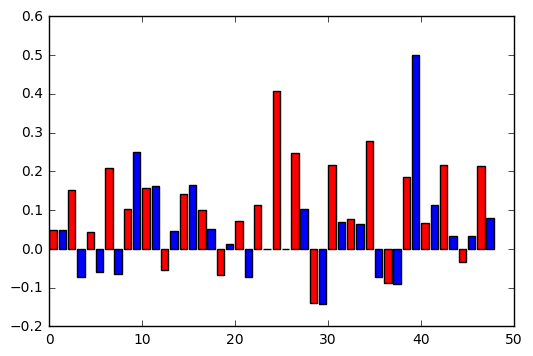

In [344]:
plt.bar(evenList, (temp_df['qq_op_gr']-1)[temp_df['company']=='MNBBL'],color='r')
plt.bar([i for i in range(1, 49, 2)], (temp_df['qq_op_gr']-1)[temp_df['company']=='NIB'])

In [345]:
first_op=temp_df['op_diff'].groupby(temp_df['company']).nth(0)


In [346]:
#geo growth 1st approach
first_op_ext=[]
for i in first_op:
    #first_op_ext.extend(first_op[i]*24)
    first_op_ext.extend([i]*24)
len(first_op_ext)
temp_df['qfqc_op_ratio']=temp_df['op_diff']/first_op_ext

In [347]:
#geo op growth second approach
#df.groupby('a')['b'].apply(list)  http://stackoverflow.com/questions/22219004/grouping-rows-in-list-in-pandas-groupby

qq_op_gr_list=temp_df.groupby('company')['qq_op_gr'].apply(list)
#qq_op_gr_list[1]    #works fine

In [348]:
op_gr=[]

for i in range(20):
    x=qq_op_gr_list[i]
    y=1
    
    for s in range(24):
        prod=np.product(x[:s+1])
        y=(prod**(1/(s+1)))
        op_gr.append(y)
        
        
op_gr[:5]

[1.05,
 0.64036859889132858,
 0.9385017270263919,
 1.0327121044260847,
 1.0153488745384784]

In [349]:
temp_df['geo_op_gr']=op_gr

In [350]:
temp_df.fillna(1, inplace=True)

In [351]:
#qq_op_gr_list=temp_df.groupby('company')['qq_op_gr'].apply(list)

#geo_op_gr_list=temp_df.groupby('company')['geo_op_gr'].apply(list)
geo_op_gr_list=temp_df.groupby('company')['qq_op_gr'].apply(list)

In [352]:
op_gr_c=[]

for i in range(20):
    x=geo_op_gr_list[i]
    y=1
    
    for s in range(24):
        prod=np.product(x[:s+1])
        #y=(prod**(1/(s+1)))
        op_gr_c.append(prod)
        
        
op_gr_c[:5]

[1.05,
 0.41007194244604328,
 0.82661870503597135,
 1.1374100719424463,
 1.0791366906474822]

In [353]:
temp_df['op_gr_cum']=op_gr_c

In [355]:
#temp_df[temp_df['company']=='EBL']

<Container object of 24 artists>

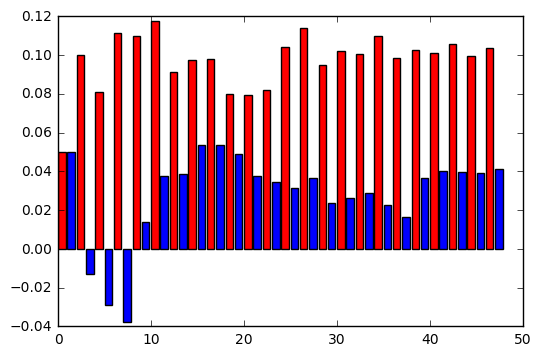

In [356]:
plt.bar(evenList, (temp_df['geo_op_gr']-1)[temp_df['company']=='MNBBL'],color='r')
plt.bar([i for i in range(1, 49, 2)], (temp_df['geo_op_gr']-1)[temp_df['company']=='NIB'])

<Container object of 24 artists>

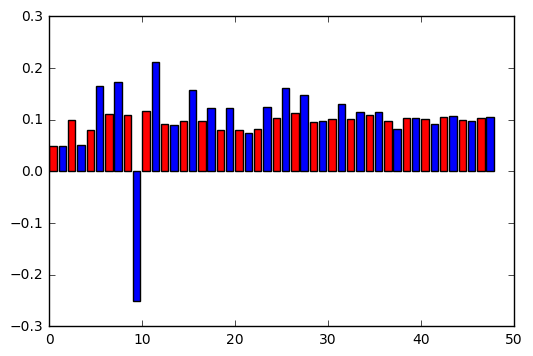

In [357]:
plt.bar(evenList, (temp_df['geo_op_gr']-1)[temp_df['company']=='MNBBL'],color='r')
plt.bar([i for i in range(1, 49, 2)], (temp_df['geo_op_gr']-1)[temp_df['company']=='SADBL'])

<Container object of 24 artists>

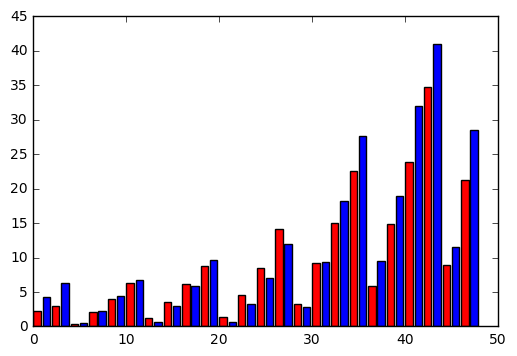

In [358]:
plt.bar(evenList, (exp_df3['np_reported']-1)[temp_df['company']=='MNBBL'],color='r')
plt.bar([i for i in range(1, 49, 2)], (exp_df3['np_reported']-1)[temp_df['company']=='CBBL'])

In [359]:
exp_df3['np_reported'].groupby(exp_df3['company']).nth(21)/exp_df3['np_reported'].groupby(exp_df3['company']).nth(1)

company
ADBL       1.606250
CBBL       5.753425
DDBL       4.363636
EBL        1.858217
EDBL       2.564103
GBBL       5.238095
HBL        2.150901
LBL        1.167109
MDB        8.083333
MNBBL      8.950000
NABIL      2.186047
NIB        2.023810
NUBL      12.242424
PCBL       3.048649
SADBL      6.812500
SANIMA     6.785714
SBI        2.866379
SBL        2.582237
SCB        1.135135
TNBL       9.875000
Name: np_reported, dtype: float64

In [360]:
exp_df3['ann_eps_op'].groupby(exp_df3['company']).nth(23)

company
ADBL       50.986842
CBBL       93.330336
DDBL      149.221790
EBL        55.815217
EDBL       65.105863
GBBL       35.985725
HBL        41.151946
LBL        33.690594
MDB        36.497326
MNBBL      39.483997
NABIL      71.258091
NIB        48.563218
NUBL      130.812500
PCBL       30.443878
SADBL      38.164026
SANIMA     32.162736
SBI        55.283505
SBL        47.477003
SCB        51.704545
TNBL       36.531008
Name: ann_eps_op, dtype: float64

In [361]:
exp_df3.columns

Index(['level_0', 'company', 'date_pub', 'yr_qtr', 'qtr_code', 'cur_assets',
       'paid_up', 'reserve', 'deposits', 'loans', 'int_earn', 'tot_op_inc',
       'op_reported', 'np_reported', 'npa', 'mp', 'qq_lo_gr', 'ln_incremental',
       'ln_incremental_01', 'ln_geo_gr', 'ann_e_op', 'ann_e_np', 'ann_eps_op',
       'ann_pe_op', 'nepse_idx', 'nepse_ret', 'pu_grth', 'pu_multiple',
       'mp_reset', 'adj_qq_ret', 'ret_diff', 'abs_ret', 'gross_ret',
       'nepse_cum_ret', 'rel_ret'],
      dtype='object')

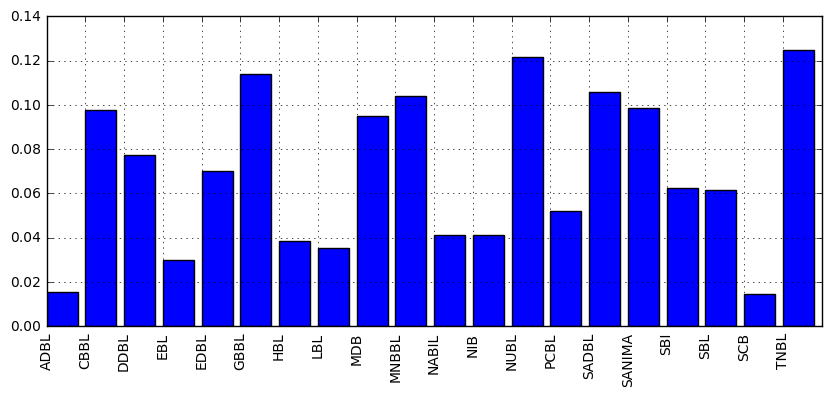

In [362]:
geo_op_list=temp_df['geo_op_gr'].groupby(temp_df['company']).nth(23).map(lambda x: x-1)  #for quarter to quarter
plt.figure(figsize=(10, 4))
plt.bar(range(20), geo_op_list) #, align='center')
plt.xticks(range(20), company_list, rotation='vertical')
plt.grid()
plt.show()

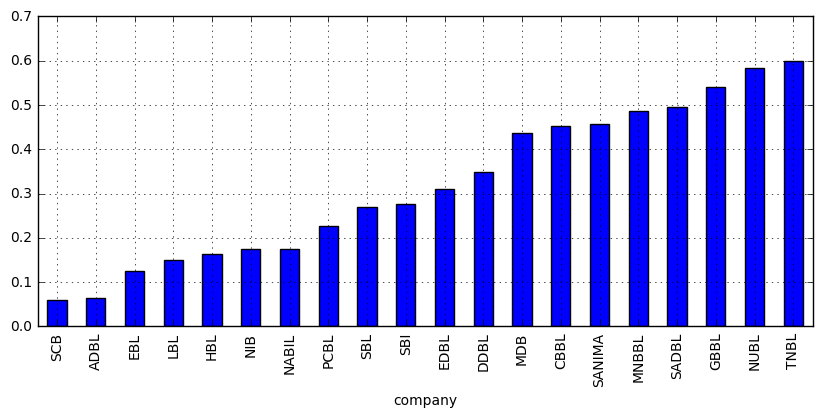

In [369]:
#for yearly growth rate
plt.figure(figsize=(10, 4))
geo_op_list=temp_df['geo_op_gr'].groupby(temp_df['company']).nth(23).map(lambda x: (x**4)-1).sort_values().plot(kind='bar')
#plt.bar(range(20), geo_op_list) #, align='center')
#plt.xticks(range(20), company_list, rotation='vertical')
plt.grid()
plt.show()

In [370]:
rel_price=(exp_df3['ann_eps_op']*15).groupby(exp_df3['company']).nth(23)/exp_df3['mp'].groupby(exp_df3['company']).nth(23)#.plot(kind='bar')

In [371]:
temp_df.columns

Index(['company', 'op_reported', 'qtr_code', 'shift_op', 'op_diff', 'qq_op_gr',
       'qfqc_op_ratio', 'geo_op_gr', 'op_gr_cum'],
      dtype='object')

In [372]:
ann_gr=(temp_df['geo_op_gr']**4).groupby(temp_df['company']).nth(23)

In [373]:
rel_price.sort_values()

company
SCB       0.388172
EBL       0.485069
HBL       0.609358
LBL       0.658019
SBL       0.698191
NABIL     0.734115
SBI       0.818611
MNBBL     0.846086
SANIMA    1.046510
NIB       1.057254
MDB       1.184978
PCBL      1.201732
CBBL      1.399955
NUBL      1.508215
GBBL      1.620979
EDBL      1.635826
TNBL      1.707056
ADBL      1.738188
SADBL     1.761417
DDBL      2.438265
dtype: float64

In [374]:
(ann_gr-1).sort_values()

company
SCB       0.060315
ADBL      0.063401
EBL       0.124910
LBL       0.149851
HBL       0.163577
NIB       0.174868
NABIL     0.175156
PCBL      0.225606
SBL       0.270053
SBI       0.275337
EDBL      0.310756
DDBL      0.348006
MDB       0.436469
CBBL      0.452207
SANIMA    0.456586
MNBBL     0.485295
SADBL     0.496021
GBBL      0.540348
NUBL      0.583240
TNBL      0.600362
Name: geo_op_gr, dtype: float64

In [375]:
ranking=rel_price/(ann_gr-1)

In [376]:
ranking.sort_values()

company
MNBBL      1.743446
SANIMA     2.292032
SBL        2.585382
NUBL       2.585925
MDB        2.714921
TNBL       2.843379
SBI        2.973121
GBBL       2.999877
CBBL       3.095829
SADBL      3.551093
HBL        3.725211
EBL        3.883338
NABIL      4.191205
LBL        4.391170
EDBL       5.264027
PCBL       5.326686
NIB        6.046016
SCB        6.435718
DDBL       7.006383
ADBL      27.415978
dtype: float64

In [377]:
PE=(rel_price/15)**(-1)

In [378]:
PE

company
ADBL       8.629677
CBBL      10.714630
DDBL       6.151917
EBL       30.923466
EDBL       9.169681
GBBL       9.253669
HBL       24.616090
LBL       22.795680
MDB       12.658462
MNBBL     17.728701
NABIL     20.432768
NIB       14.187692
NUBL       9.945533
PCBL      12.481984
SADBL      8.515873
SANIMA    14.333358
SBI       18.323730
SBL       21.484086
SCB       38.642637
TNBL       8.787056
dtype: float64

In [379]:
PEG=PE/((ann_gr-1)*100)

In [380]:
PEG.sort_values()

company
TNBL      0.146363
NUBL      0.170522
GBBL      0.171254
SADBL     0.171684
DDBL      0.176776
CBBL      0.236941
MDB       0.290020
EDBL      0.295077
SANIMA    0.313925
MNBBL     0.365318
PCBL      0.553265
SBI       0.665502
SBL       0.795550
NIB       0.811338
NABIL     1.166546
ADBL      1.361136
HBL       1.504866
LBL       1.521227
EBL       2.475656
SCB       6.406772
dtype: float64

In [381]:
lq_lo_gr=exp_df3['qq_lo_gr'].groupby(exp_df3['company']).nth(23)

In [382]:
lq_lo_gr

company
ADBL      1.072969
CBBL      1.056818
DDBL      1.090698
EBL       1.044297
EDBL      1.087879
GBBL      1.081331
HBL       1.046827
LBL       1.091450
MDB       1.048544
MNBBL     1.144231
NABIL     1.080919
NIB       1.023931
NUBL      1.065559
PCBL      1.087624
SADBL     1.078571
SANIMA    1.052018
SBI       1.141302
SBL       1.065642
SCB       1.097561
TNBL      1.040404
Name: qq_lo_gr, dtype: float64

In [383]:
comp=PEG/((lq_lo_gr-1)*10)

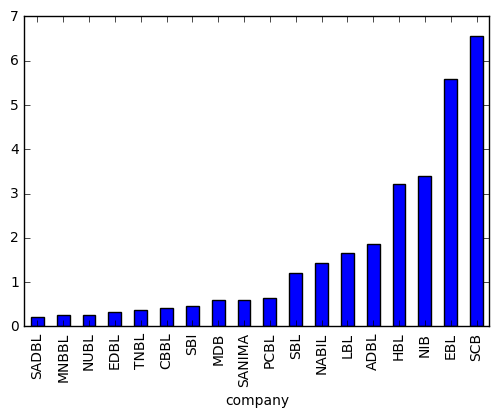

In [384]:
#EBL and Dev coming in neg values
comp.sort_values()[2:].plot(kind='bar')

In [385]:
#Modeling differently
#Near future earning: Emphasize recent quarterly loan growth, recent 4q, wieghts .5/.25/.125/.125
#sustaibility: long term annual geometric growth neth(last) - higher is better
#price: current PE  - lower is better
#Finally compare witn a. MNBBL  b.average or median

In [386]:
temp_df.columns

Index(['company', 'op_reported', 'qtr_code', 'shift_op', 'op_diff', 'qq_op_gr',
       'qfqc_op_ratio', 'geo_op_gr', 'op_gr_cum'],
      dtype='object')

In [387]:
exp_df3.columns

Index(['level_0', 'company', 'date_pub', 'yr_qtr', 'qtr_code', 'cur_assets',
       'paid_up', 'reserve', 'deposits', 'loans', 'int_earn', 'tot_op_inc',
       'op_reported', 'np_reported', 'npa', 'mp', 'qq_lo_gr', 'ln_incremental',
       'ln_incremental_01', 'ln_geo_gr', 'ann_e_op', 'ann_e_np', 'ann_eps_op',
       'ann_pe_op', 'nepse_idx', 'nepse_ret', 'pu_grth', 'pu_multiple',
       'mp_reset', 'adj_qq_ret', 'ret_diff', 'abs_ret', 'gross_ret',
       'nepse_cum_ret', 'rel_ret'],
      dtype='object')

In [388]:
exp_df3.ix[20:23]['qq_lo_gr']#.groupby(exp_df3['company'])

20    1.099156
21    1.073785
22    1.017304
23    1.072969
Name: qq_lo_gr, dtype: float64

In [389]:
#.ix[20:23]
#['qq_lo_gr']

#df.groupby('id').head(2).reset_index(drop=True)

#exp_df3.groupby('company').tail(4).reset_index() #works fine
lo_wt_df=exp_df3['qq_lo_gr'].groupby(exp_df3['company']).tail(4).reset_index()#.head()
lo_wt_df=exp_df3[['company', 'qq_lo_gr']].groupby(exp_df3['company']).tail(4).reset_index()

In [390]:
#Giving wieght to last 4q of loans, make a list and multiply then take a mean of each 4 item
weight_list=[.075, .125, .25, .55]*20
len(weight_list)

80

In [391]:
lo_wt_df['wtd_lo_calc']=lo_wt_df['qq_lo_gr']*weight_list
lo_wt_df.head(3)

,index,company,qq_lo_gr,wtd_lo_calc
0,20,ADBL,1.099156,0.082437
1,21,ADBL,1.073785,0.134223
2,22,ADBL,1.017304,0.254326


In [392]:
wtd_lo_calc=lo_wt_df['wtd_lo_calc'].groupby(lo_wt_df['company']).sum()

In [393]:
wtd_lo_calc[0:]

company
ADBL      1.061119
CBBL      1.065108
DDBL      1.096342
EBL       1.052806
EDBL      1.084862
GBBL      1.157490
HBL       1.052210
LBL       1.066190
MDB       1.050952
MNBBL     1.144172
NABIL     1.082902
NIB       1.045107
NUBL      1.079816
PCBL      1.078311
SADBL     1.092590
SANIMA    1.075301
SBI       1.116352
SBL       1.082432
SCB       1.074683
TNBL      1.075282
Name: wtd_lo_calc, dtype: float64

In [394]:
exp_df3['qq_lo_gr'][exp_df3['company']=='MNBBL'][20:]

236    1.094148
237    1.151163
238    1.155556
239    1.144231
Name: qq_lo_gr, dtype: float64

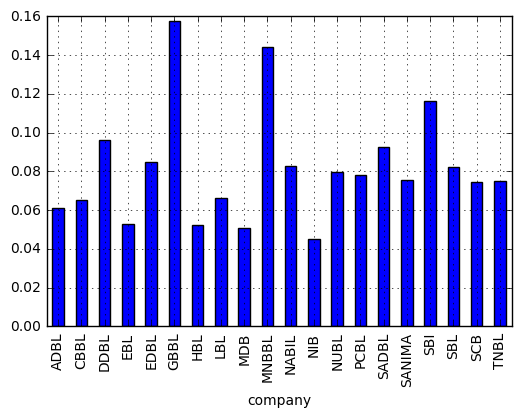

In [395]:
((lo_wt_df['wtd_lo_calc'].groupby(lo_wt_df['company']).sum())-1).plot(kind='bar')
#((lo_wt_df['wtd_lo_calc'].groupby(lo_wt_df['company']).sum())-1).plot()
plt.grid()

In [396]:
#new model will have 1/3wt for wt_lo, .33 for sustained grth, .33 for inverse of PE
#All should be in higher side
PE_inv=1/PE
PE_inv

company
ADBL      0.115879
CBBL      0.093330
DDBL      0.162551
EBL       0.032338
EDBL      0.109055
GBBL      0.108065
HBL       0.040624
LBL       0.043868
MDB       0.078999
MNBBL     0.056406
NABIL     0.048941
NIB       0.070484
NUBL      0.100548
PCBL      0.080115
SADBL     0.117428
SANIMA    0.069767
SBI       0.054574
SBL       0.046546
SCB       0.025878
TNBL      0.113804
dtype: float64

In [397]:
ann_gr

company
ADBL      1.063401
CBBL      1.452207
DDBL      1.348006
EBL       1.124910
EDBL      1.310756
GBBL      1.540348
HBL       1.163577
LBL       1.149851
MDB       1.436469
MNBBL     1.485295
NABIL     1.175156
NIB       1.174868
NUBL      1.583240
PCBL      1.225606
SADBL     1.496021
SANIMA    1.456586
SBI       1.275337
SBL       1.270053
SCB       1.060315
TNBL      1.600362
Name: geo_op_gr, dtype: float64

In [398]:
#make a df with selected values ie wieghted loan, geo, grth and inv of PE then standardize to bring them to same scale
#data = pd.DataFrame({"A": range(3)})
#val_model_df=pd.DataFrame({'company':company_list, 'ann_gr': ann_gr, 'PE_inv':PE_inv, 'wtd_lo_calc':wtd_lo_calc })
#lo_wt_df['wtd_lo_calc'].groupby(lo_wt_df['company']).sum()
val_model_df=pd.DataFrame({ 'ann_gr': ann_gr, 'PE_inv':PE_inv,'wtd_lo_calc':wtd_lo_calc})

In [399]:
#val_model_df.reset_index().head()

In [400]:
#df.prod(axis=1)
val_model_df['prod_ind']=val_model_df.sum(axis=1)

In [401]:
#df[["A", "B"]].multiply(df["C"], axis="index")
val_model_df['PEG_inv']=val_model_df['PE_inv'].multiply(val_model_df['ann_gr'], axis='index')
val_model_df.head(20)

,PE_inv,ann_gr,wtd_lo_calc,prod_ind,PEG_inv
company,,,,,
ADBL,0.115879,1.063401,1.061119,2.240399,0.123226
CBBL,0.093330,1.452207,1.065108,2.610645,0.135535
DDBL,0.162551,1.348006,1.096342,2.606899,0.219120
EBL,0.032338,1.124910,1.052806,2.210054,0.036377
EDBL,0.109055,1.310756,1.084862,2.504672,0.142945
GBBL,0.108065,1.540348,1.157490,2.805904,0.166458
HBL,0.040624,1.163577,1.052210,2.256411,0.047269
LBL,0.043868,1.149851,1.066190,2.259909,0.050442
MDB,0.078999,1.436469,1.050952,2.566419,0.113479


In [402]:
#val_model_df['PEG']=PE/(PEG*100)
val_model_df['PEG']=list(PE/((ann_gr-1)*100))
#PE/((ann_gr-1)*100)

In [403]:
val_model_df.mean()

PE_inv         0.078460
ann_gr         1.319618
wtd_lo_calc    1.081701
prod_ind       2.479779
PEG_inv        0.106596
PEG            0.979987
dtype: float64

In [413]:
val_model_df.head(20)

,PE_inv,ann_gr,wtd_lo_calc,prod_ind,PEG_inv,PEG,new_idx,new_idx_norm
company,,,,,,,,
ADBL,0.115879,1.063401,1.061119,2.240399,0.123226,1.361136,1.354796,0.064419
CBBL,0.093330,1.452207,1.065108,2.610645,0.135535,0.236941,0.191720,-0.119774
DDBL,0.162551,1.348006,1.096342,2.606899,0.219120,0.176776,0.141975,-0.127652
EBL,0.032338,1.124910,1.052806,2.210054,0.036377,2.475656,2.463165,0.239949
EDBL,0.109055,1.310756,1.084862,2.504672,0.142945,0.295077,0.264001,-0.108327
GBBL,0.108065,1.540348,1.157490,2.805904,0.166458,0.171254,0.117219,-0.131573
HBL,0.040624,1.163577,1.052210,2.256411,0.047269,1.504866,1.488508,0.085595
LBL,0.043868,1.149851,1.066190,2.259909,0.050442,1.521227,1.506242,0.088404
MDB,0.078999,1.436469,1.050952,2.566419,0.113479,0.290020,0.246373,-0.111119


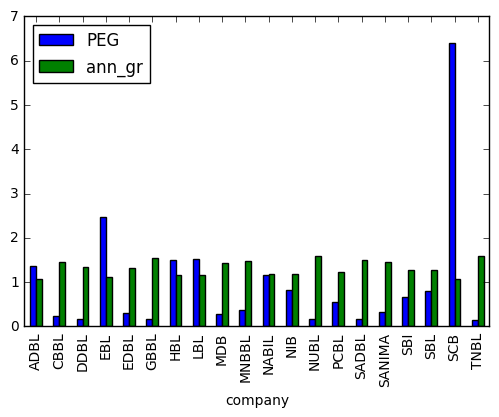

In [405]:
#val_model_df.set_index('company')[['PEG', 'ann_gr']].plot(kind='bar')
val_model_df[['PEG', 'ann_gr']].plot(kind='bar')

In [406]:
val_model_df['new_idx']=val_model_df['PEG']-(val_model_df['ann_gr']-1)*.1

In [407]:
#df.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
x_mean=val_model_df.new_idx.dropna().mean()
x_max=val_model_df.new_idx.dropna().max()
x_min=val_model_df.new_idx.dropna().min()

val_model_df['new_idx_norm']=val_model_df['new_idx'].apply(lambda x: (x-x_mean)/(x_max-x_min))

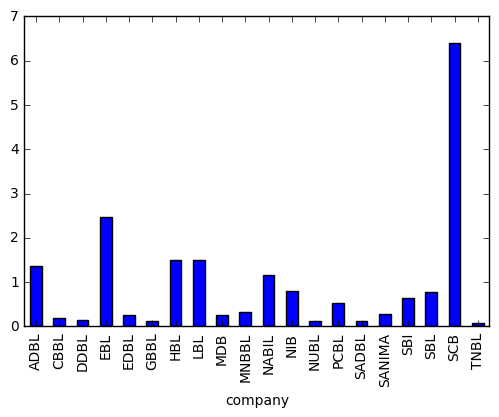

In [408]:
#val_model_df.set_index('company')['new_idx'].plot(kind='bar')
val_model_df['new_idx'].plot(kind='bar')

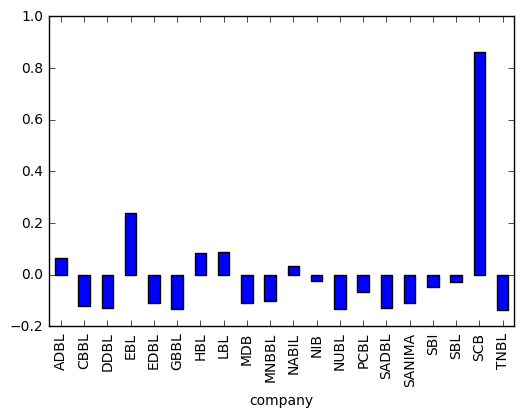

In [409]:
val_model_df['new_idx_norm'].plot(kind='bar')

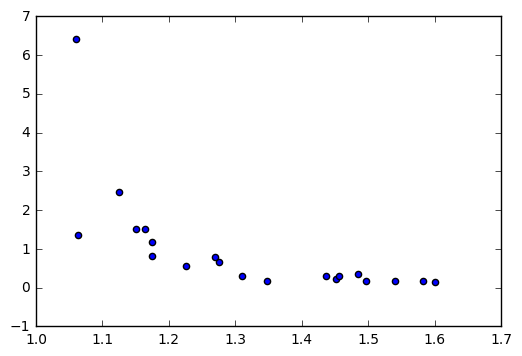

In [410]:
plt.scatter(val_model_df['ann_gr'], val_model_df['PEG'])

In [414]:
val_model_df['mnbbl_mark']=val_model_df['new_idx_norm']/-0.099968

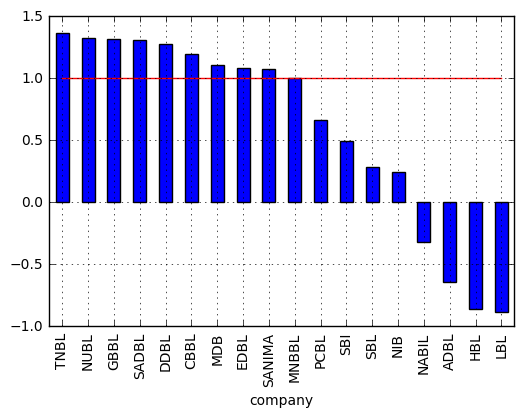

In [415]:
#val_model_df.set_index('company')['mnbbl_mark'].plot(kind='bar')
#ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')


#val_model_df[val_model_df['mnbbl_mark']>-1].set_index('company')['mnbbl_mark'].plot(kind='bar')
#.set_index('company') was redundant
val_model_df[val_model_df['mnbbl_mark']>-1]['mnbbl_mark'].sort_values(ascending=False).plot(kind='bar')
plt.plot(range(18), [1]*18, color='r')
plt.grid()


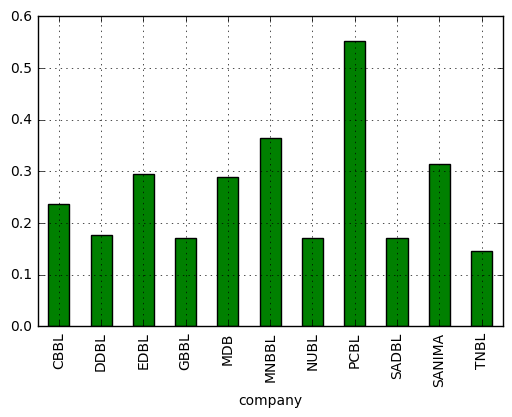

In [416]:
#.set_index('company') between PEGs was redundant
val_model_df[val_model_df['PEG']<.6]['PEG'].plot(kind='bar', color = 'g')
#val_model_df[val_model_df['PEG']<.6].set_index('company')['PEG'].plot(kind='bar', color = 'g')
#val_model_df[val_model_df['PEG']>.4].set_index('company')['PEG'].plot(kind='bar', color = 'g')
plt.grid()
plt.show()

In [418]:
#temp_df['qq_op_gr'].groupby(temp_df['company']).tail(4)#.mean()#.reset_index()

In [ ]:
#care less about PE and care most about business growth, followed by sustainable growth in earning
#Willing to pay a bit higer price for those two things

In [ ]:
#grouping the financial institutions in their own group
#c, d, m, f as per companies then replace with COM...., then extend each  24 x and finally make a column

In [419]:
exp_df3['company'].unique()[0]

'ADBL'

In [420]:
abb_symb=['c', 'm', 'm', 'c', 'd', 'd', 'c', 'c', 'd', 'd', 'c', 'c', 'm', 'c', 'd', 'c', 'c', 'c', 'c', 'd']
len(abb_symb)

20

In [421]:
#checkig 
from collections import Counter
#for i in range (20):
    #print (exp_df3['company'].unique()[i], (abb_symb[i]))   #All correct
print (Counter(abb_symb).keys())
Counter(abb_symb).values()

dict_keys(['c', 'm', 'd'])


dict_values([11, 3, 6])

In [422]:
#replacing the letters with app abb and extending it 24*
sub_group1=['COM' if x=='c' else 'DEV' if x=='d' else 'MIC' for x in abb_symb]#*24
#sub_group =[[i]*24 for i in sub_group]
sub_group=[]
for i in range (20):
    sub_group.extend([sub_group1[i]]*24)  #works fine


In [423]:
len(sub_group)

480

In [424]:
exp_df3['sub_group']=sub_group

In [425]:
#exp_df3['paid_up'].groupby(exp_df3['company']).nth(23)
exp_df3['paid_up'].groupby(exp_df3['sub_group']).mean()  #gives mean of all not last values

sub_group
COM    284.008333
DEV     32.155556
MIC     24.793056
Name: paid_up, dtype: float64

In [426]:
exp_df3['paid_up'][exp_df3['sub_group']=='COM'].groupby(exp_df3['company']).nth(23).mean()

501.05454545454546

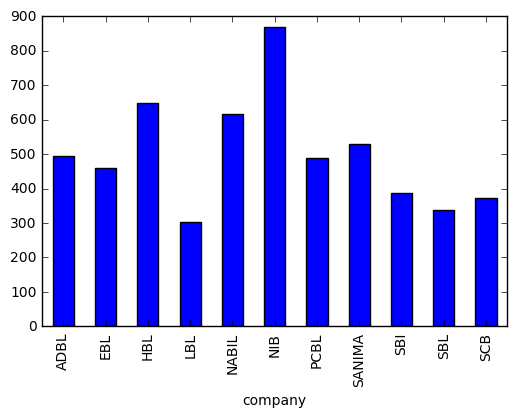

In [427]:
exp_df3['paid_up'][exp_df3['sub_group']=='COM'].groupby(exp_df3['company']).nth(23).plot(kind='bar')

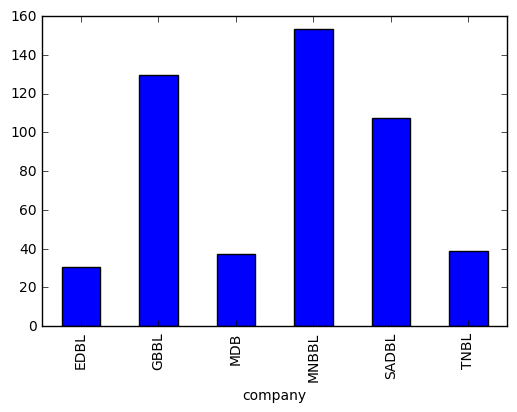

In [428]:
exp_df3['paid_up'][exp_df3['sub_group']=='DEV'].groupby(exp_df3['company']).nth(23).plot(kind='bar')

In [429]:
#model 2 - here pe is less emphasized and companies 

In [ ]:
#model 2 - here pe is less emphasized and companies ... to be continue

In [435]:
#
#df['diff'] = df.apply(lambda x: x['market price'] - x['mangoes price'] if not np.isnan(x['mangoes price']) else x['diff'], axis=1)
#temp_df['op_cur_q']=temp_df.apply(lambda x: x['op_reported']-x['shift_op'] if x['qtr_code']!=1 else x['op_reported'], axis=1)
#temp_df['op_cur_q'].fillna(method='bfill', inplace=True)
#temp_df.head()

#Shift_cur_op=temp_df['op_cur_q'].groupby(temp_df['company']).shift()
#http://stackoverflow.com/questions/36588522/take-difference-between-two-column-of-pandas-dataframe-based-on-condition-in-pyt
#temp_df['qq_op_gr']=temp_df['op_cur_q']/temp_df['op_cur_q'].groupby(temp_df['company']).shift()
#temp_df.fillna(1.1, inplace=True)   ##To be merged
#temp_df